### Import libraries

In [1]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
from config import CFG
from matplotlib import pyplot as plt
from PIL import Image
import seaborn as sns

import numpy as np
import torch
import torch.nn.functional as F
from torchvision import transforms

### Load data

In [2]:
label_data = pd.read_csv(os.path.join(CFG.train_data_dir, '文件标签汇总数据.csv'))
train_csv_folder = os.path.join(CFG.train_data_dir, 'csv文件')
test_A_csv_folder = os.path.join(CFG.test_A_data_dir, 'csv文件')
train_image_folder = os.path.join(CFG.project_name, 'project/image/训练集数据')
test_A_image_folder = os.path.join(CFG.project_name, 'project/image/A榜测试集数据')

In [8]:
# 读取训练集数据
train_image_list = os.listdir(os.path.join(train_image_folder, 'A'))
image_path = os.path.join(train_image_folder, 'A', train_image_list[0])

In [9]:
image = Image.open(image_path).convert('L')

In [12]:
# 转换为张量
transform = transforms.Compose([
    transforms.ToTensor(),
])
image_tensor = transform(image).unsqueeze(0)  # 添加一个批处理维度

In [14]:
# 定义 Sobel 算子
sobel_x = torch.tensor([[-1., 0., 1.], [-2., 0., 2.], [-1., 0., 1.]]).view((1, 1, 3, 3))
sobel_y = torch.tensor([[-1., -2., -1.], [0., 0., 0.], [1., 2., 1.]]).view((1, 1, 3, 3))

In [15]:
# 将算子和图像放到相同的设备上
if torch.cuda.is_available():
    sobel_x = sobel_x.cuda()
    sobel_y = sobel_y.cuda()
    image_tensor = image_tensor.cuda()

In [16]:
edge_x = F.conv2d(image_tensor, sobel_x, padding=1)
edge_y = F.conv2d(image_tensor, sobel_y, padding=1)

In [17]:
edges = torch.sqrt(edge_x ** 2 + edge_y ** 2).squeeze(0).squeeze(0)

In [18]:
edge_image = transforms.ToPILImage()(edges.cpu())

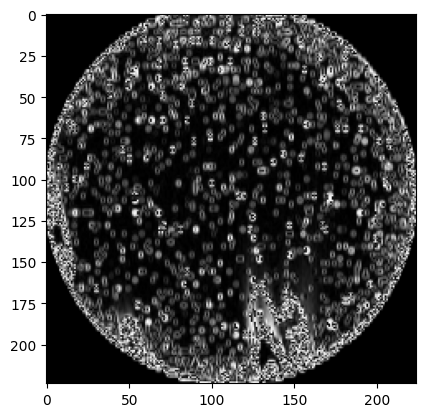

In [20]:
plt.imshow(edge_image, cmap='gray')

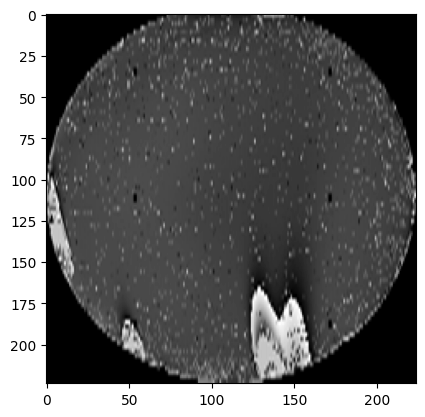

In [21]:
plt.imshow(image, cmap='gray')